In [145]:
import numpy as np
import pandas as pd
from dict_maps import fret_distances
import matplotlib.pyplot as plt
from UIParse import parseleft_S

### init

In [2]:
"""
UI_out_rh: [['C M', 'A m', 'F M', 'G M'], ['A m', 'C M', 'F M', 'G M']],
UI_out_lh: [['D', 'U', 'D', '', 'D', '', 'D', 'U'], ['D', 'U', 'D', 'U', 'D', 'D', 'D', 'U']], 
measure_time: 4.0, 
chordsDB: Bot
"""

UI_Out_leftHand = [['C M', 'A m', 'F M', 'G M'], ['A m', 'C M', 'F M', 'G M'], ['C M', 'A m', 'F M', 'G M'], ['A m', 'C M', 'F M', 'G M']]
# UI_Out_rightHand = [['D', 'U', 'D', 'U', 'D', 'U', 'D', 'U'], ['D', 'U', 'D', 'U', 'D', 'D', 'D', 'U']]
measure_time = 4.0
chordsDB = 'Bot'


numStrings = 6
inversions = 0
if chordsDB == 'Bot':
    df = pd.read_csv(f'all_chords_9frets_v2_{numStrings}str_inv{inversions}.csv')
else:
    df = pd.read_csv(f'humanPlayable_9frets.csv')

## Compute costs for different selection methods


In [386]:
def flatten(li):
    flat_list = []
    for sublist in li:
        for item in sublist:
            flat_list.append(item)
    return flat_list

def evaluate_cost(li):
    flat_prog = flatten(li)
    costs = []
    fretpos = flat_prog[0][0]
    playstate = flat_prog[0][1]
    plucked = [2, '2', '2.0']
    for i in range(1, len(flat_prog)):
        cost = 0
        for j in range(6):
            if flat_prog[i][1][j] in plucked:
                cost += abs(float(fret_distances[str(flat_prog[i][0][j])])-float(fret_distances[str(flat_prog[i-1][0][j])]))
            else:
                cost += 0
        costs.append(cost)
    return costs

#### 1. Random selection

In [387]:
optimizer = 'random'
UI_Out_leftHand = [['C M', 'A m', 'F M', 'G M'], ['A m', 'C M', 'F M', 'G M'], ['C M', 'A m', 'F M', 'G M'], ['A m', 'C M', 'F M', 'G M']]
li_random, firstc_random  = parseleft_S(UI_Out_leftHand, df, optimizer, chordsDB)
print (li_random)

root: C, chordType: M
root: A, chordType: m
root: F, chordType: M
root: G, chordType: M
root: A, chordType: m
root: C, chordType: M
root: F, chordType: M
root: G, chordType: M
root: C, chordType: M
root: A, chordType: m
root: F, chordType: M
root: G, chordType: M
root: A, chordType: m
root: C, chordType: M
root: F, chordType: M
root: G, chordType: M
[[[[8, 7, 5, 5, 8, 5], [2, 2, 2, 2, 2, 1]], [[5, 3, 7, 9, 1, 8], [2, 2, 2, 2, 2, 2]], [[1, 5, 7, 5, 6, 8], [2, 1, 2, 2, 2, 2]], [[3, 5, 9, 5, 3, 7], [2, 2, 2, 1, 2, 2]]], [[[5, 3, 7, 5, 5, 8], [2, 2, 2, 2, 2, 2]], [[8, 7, 5, 5, 8, 5], [2, 2, 2, 2, 2, 1]], [[1, 3, 3, 2, 6, 8], [2, 2, 2, 2, 2, 2]], [[3, 5, 9, 5, 8, 7], [2, 2, 2, 1, 2, 2]]], [[[8, 7, 5, 5, 8, 8], [2, 2, 2, 2, 2, 2]], [[5, 7, 7, 9, 1, 8], [2, 2, 2, 2, 2, 2]], [[1, 3, 7, 5, 6, 5], [2, 2, 2, 2, 2, 2]], [[3, 2, 5, 5, 8, 7], [2, 2, 1, 1, 2, 2]]], [[[8, 5, 2, 2, 1, 5], [2, 1, 2, 2, 2, 2]], [[8, 7, 5, 5, 8, 8], [2, 2, 2, 2, 2, 2]], [[1, 3, 3, 5, 6, 5], [2, 2, 2, 2, 2, 2]], [[3, 5, 5,

In [388]:
# print (f'li_random length/ numMeasures: {len(li_random)}, li_random[0]/ cpm: {len(li_random[0])}, li_random[0][0]/ fretnum, playcommand: {li_random[0][0]}')
costs_random = evaluate_cost(li_random)
costs_random

[635.0,
 372.0,
 226.0,
 264.0,
 330.0,
 612.2,
 368.0,
 327.0,
 439.0,
 568.0,
 202.2,
 594.4,
 532.4,
 514.0,
 343.0]

#### 2. Cost based optimization

In [357]:
optimizer = 'cost'
UI_Out_leftHand = [['C M', 'A m', 'F M', 'G M'], ['A m', 'C M', 'F M', 'G M'], ['C M', 'A m', 'F M', 'G M'], ['A m', 'C M', 'F M', 'G M']]
li_cost, firstc_cost  = parseleft_S(UI_Out_leftHand, df, optimizer, chordsDB)
print (li_cost)

root: C, chordType: M
root: A, chordType: m
root: C, chordType: M
root: A, chordType: m
[[[[8, 7, 5, 5, 8, 8], [2, 2, 2, 2, 2, 2]], [[5.0, 7.0, 7.0, 5.0, 5.0, 8.0], [2, 2, 2, 2, 2, 2]], [[1.0, 8.0, 7.0, 5.0, 6.0, 8.0], [2, 2, 2, 2, 2, 2]], [[3.0, 5.0, 5.0, 4.0, 8.0, 7.0], [2, 2, 2, 2, 2, 2]]], [[[8, 5, 2, 5, 5, 5], [2, 1, 2, 2, 2, 2]], [[8.0, 7.0, 5.0, 5.0, 5.0, 3.0], [2, 2, 2, 2, 2, 2]], [[1.0, 8.0, 7.0, 5.0, 6.0, 5.0], [2, 2, 2, 2, 2, 2]], [[3.0, 5.0, 5.0, 4.0, 8.0, 7.0], [2, 2, 2, 2, 2, 2]]], [[[8, 7, 5, 5, 5, 3], [2, 2, 2, 2, 2, 2]], [[5.0, 7.0, 7.0, 5.0, 5.0, 5.0], [2, 2, 2, 2, 2, 2]], [[1.0, 8.0, 7.0, 5.0, 6.0, 5.0], [2, 2, 2, 2, 2, 2]], [[3.0, 5.0, 5.0, 4.0, 8.0, 7.0], [2, 2, 2, 2, 2, 2]]], [[[5, 7, 7, 9, 1, 8], [2, 2, 2, 2, 2, 2]], [[8.0, 7.0, 5.0, 9.0, 1.0, 8.0], [2, 2, 2, 2, 2, 2]], [[1.0, 8.0, 7.0, 5.0, 6.0, 8.0], [2, 2, 2, 2, 2, 2]], [[3.0, 5.0, 5.0, 4.0, 8.0, 7.0], [2, 2, 2, 2, 2, 2]]]]


In [358]:
costs_greedy = evaluate_cost(li_cost)

shape of flat_prog: (16, 2, 6)
[8, 7, 5, 5, 8, 8] [2, 2, 2, 2, 2, 2]
flat prog[i][1]: [2, 2, 2, 2, 2, 2], length: 6
flat prog[i][1]: [2, 2, 2, 2, 2, 2], length: 6
flat prog[i][1]: [2, 2, 2, 2, 2, 2], length: 6
flat prog[i][1]: [2, 2, 2, 2, 2, 2], length: 6
flat prog[i][1]: [2, 2, 2, 2, 2, 2], length: 6
flat prog[i][1]: [2, 2, 2, 2, 2, 2], length: 6
flat prog[i][1]: [2, 2, 2, 2, 2, 2], length: 6
flat prog[i][1]: [2, 2, 2, 2, 2, 2], length: 6
flat prog[i][1]: [2, 2, 2, 2, 2, 2], length: 6
flat prog[i][1]: [2, 2, 2, 2, 2, 2], length: 6
flat prog[i][1]: [2, 2, 2, 2, 2, 2], length: 6
flat prog[i][1]: [2, 2, 2, 2, 2, 2], length: 6
flat prog[i][1]: [2, 2, 2, 2, 2, 2], length: 6
flat prog[i][1]: [2, 2, 2, 2, 2, 2], length: 6
flat prog[i][1]: [2, 2, 2, 2, 2, 2], length: 6
flat prog[i][1]: [2, 2, 2, 2, 2, 2], length: 6
flat prog[i][1]: [2, 2, 2, 2, 2, 2], length: 6
flat prog[i][1]: [2, 2, 2, 2, 2, 2], length: 6
flat prog[i][1]: [2, 1, 2, 2, 2, 2], length: 6
flat prog[i][1]: [2, 1, 2, 2, 2, 2], l

In [10]:
# UI_Out_leftHand = [['C M', 'A m', 'F M', 'G M'], ['A m', 'C M', 'F M', 'G M'], ['C M', 'A m', 'F M', 'G M'], ['A m', 'C M', 'F M', 'G M']]
# chordsDB = 'Human'


# numStrings = 6
# inversions = 0
# if chordsDB == 'Bot':
#     df = pd.read_csv(f'all_chords_9frets_v2_{numStrings}str_inv{inversions}.csv')
#     # df = pd.read_csv(f'all_chords_9frets_v2.csv')
# else:
#     df = pd.read_csv(f'humanPlayable_9frets.csv')

# optimizer = 'random'
# UI_Out_leftHand = [['C M', 'A m', 'F M', 'G M'], ['A m', 'C M', 'F M', 'G M'], ['C M', 'A m', 'F M', 'G M'], ['A m', 'C M', 'F M', 'G M']]
# li_human, firstc_cost  = parseleft_S(UI_Out_leftHand, df, optimizer)
# print (li_human)

### Comparison

In [11]:
print (np.mean(costs_random))
print (np.mean(costs_greedy))

388.9866666666666
322.4533333333333


Text(0.5, 0, 'transitionNum')

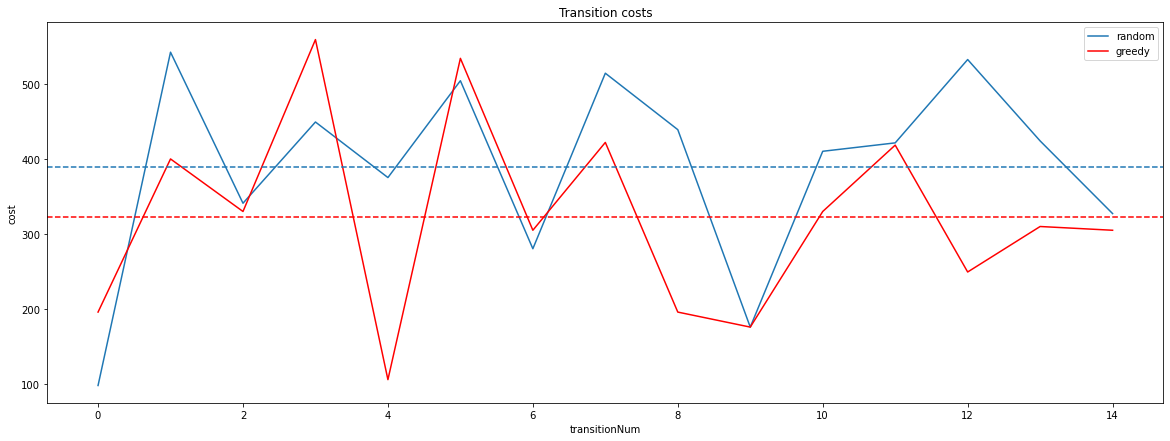

In [12]:
plt.figure(figsize = (20, 7))
plt.plot(costs_random)
plt.plot(costs_greedy, color = 'r')
plt.axhline(y = np.mean(costs_random), linestyle = '--')
plt.axhline(y = np.mean(costs_greedy), color = 'r', linestyle = '--')
plt.title('Transition costs')
plt.legend(['random', 'greedy'])
plt.ylabel('cost')
plt.xlabel('transitionNum')

### Viterbi

In [350]:
from chordPlayback import getAllPossibilities, convert_df_to_chord_array, transform_to_fretnum_fretplay

fret_distances = {
        "0": 0,
        "1": 14,
        "2": 36.8,
        "3": 73,
        "4": 105,
        "5": 135,
        "6": 162,
        "7": 188,
        "8": 216,
        "9": 238,
        "10": 257,
        "0.0": 0,
        "1.0": 14,
        "2.0": 36.8,
        "3.0": 73,
        "4.0": 105,
        "5.0": 135,
        "6.0": 162,
        "7.0": 188,
        "8.0": 216,
        "9.0": 238,
        "10.0": 257
}

In [377]:
# Viterbi
def flatten(li):
    flat_list = []
    for sublist in li:
        for item in sublist:
            flat_list.append(item)
    return flat_list

def compute_cost(curr_state, potential_state, fret_distances):
    """
    Cost function agnostic of the number of strings
    
    inputs
    curr_state: Doesn't necessarily have to be one of the exact chord positions in the df. X can be replaced by any other fretnum, same for 0.
    potential_state: to compute cost wrt current

    outputs
    cost, updated_state
    """
    cost = 0
        
    for i, curr in enumerate(curr_state):
        pot = float(fret_distances[str(potential_state[i])])
        c = float(fret_distances[str(curr)])
        cost += abs(c - pot)
    updated_state = potential_state
    updated_state, updated_play = transform_to_fretnum_fretplay(updated_state)
    return cost, updated_state, updated_play


def get_fingerings(chord_progression):
    num_chords = len(chord_progression)
    fingerings = []
    num_fingerings = []
    
    for i in range(num_chords):
        root = chord_progression[i].split(' ')[0]
        chordType = chord_progression[i].split(' ')[1]
        df_shortlisted = getAllPossibilities(df, root, chordType)
        # Convert all possible chords to fretnum arrays
        next_fretnum_all = convert_df_to_chord_array(df_shortlisted)
        fingerings.append(next_fretnum_all)
        num_fingerings.append(len(next_fretnum_all))
    
    return fingerings, num_fingerings, num_chords


def convert_cost_to_prob(cost, cost_range, cost_max):
    cost_min = cost_max-cost_range
    prob = 1-cost/(cost_max-cost_min)
    return prob

def initialize_viterbi(num_fingerings, num_chords):
    viterbi = np.zeros((num_chords, max(num_fingerings)))
    # updated_states_all = np.zeros((num_chords, max(num_fingerings)))
    backpointer = np.zeros((num_chords, max(num_fingerings)), dtype=int)
    viterbi[0, :] = np.ones(max(num_fingerings))
    return viterbi, backpointer


def terminate_viterbi(viterbi):
    best_cost = np.min(viterbi[-1, :])
    best_fingering = np.argmax(viterbi[-1, :])
    best_trajectory = [best_fingering]
    return best_cost, best_fingering, best_trajectory

def get_best_trajectory(num_chords, backpointer, best_trajectory, best_fingering):
    for t in range(num_chords-1, 0, -1):
        best_fingering = backpointer[t, best_fingering] # Get the best fingering index for the previous chord
        best_trajectory.insert(0, best_fingering)   # Insert at the beginning of the list
    
    return best_trajectory, best_fingering

def post_process_viterbi(li_viterbi_tmp):
    numMeasures = len(li_viterbi_tmp)//4
    li_viterbi = []
    for m in range(numMeasures):
        li_vib = []
        for i in range(4):
            tmp = li_viterbi_tmp[m*4+i]
            li_vib.append(tmp)
        li_viterbi.append(li_vib)
    return li_viterbi

def get_final_trajectory(best_trajectory, updated_fingerings, updated_playcommands):
    final_trajectory = []
    final_rh = []
    for i, traj in enumerate(best_trajectory):
        try:
            fing = [updated_fingerings[i][traj]]
            if i != len(best_trajectory)-1:
                fing.append(updated_playcommands[i][traj])
            else:
                fing.append([2, 2, 2, 2, 2, 2])
            final_trajectory.append(fing)
        except:
            continue
    return final_trajectory

def initialize_updated_playcommands(num_chords, num_fingerings):
    updated_playcommands = []
    for i in range(num_chords):
        updated_playcommands.append([])
        for j in range(num_fingerings[i]):
            updated_playcommands[i].append([])
    return updated_playcommands

def viterbi_recursion(num_chords, num_fingerings, fingerings, fret_distances, range_cost, max_cost, viterbi, backpointer, updated_fingerings, updated_playcommands):
    for t in range(1, num_chords):
        # Back calculate costs one step at a time
        for j in range(num_fingerings[t]):
            costs = []
            # updated_states = []
            for i in range(num_fingerings[t-1]):
                potential_prev_state = fingerings[t-1][i] # curr_state is the ith fingering of the previous chord
                curr_state = fingerings[t][j]  # potential_state is the jth fingering of the current chord
                # TODO: Use updated_play
                cost, updated_state, updated_play = compute_cost(curr_state, potential_prev_state, fret_distances)
                cost = convert_cost_to_prob(cost, range_cost, max_cost)
                costs.append(cost)
                updated_fingerings[t-1][i] == updated_state
                updated_playcommands[t-1][i] = updated_play
            while len(costs) < max(num_fingerings):
                max_cost_prob = convert_cost_to_prob(max_cost, range_cost, max_cost)
                costs.append(max_cost_prob)
            
            prob_transitions = viterbi[t-1, :] * costs
            best_state = np.argmax(prob_transitions)
            viterbi[t, j] = prob_transitions[best_state]
            backpointer[t, j] = best_state
    
    return viterbi, backpointer, updated_fingerings, updated_playcommands

def viterbi_search(chord_progression, df, fret_distances):
    """
    Viterbi algorithm for finding the most likely trajectory of fingerings given a chord progression.
    """
    # Define cost boundaries for later computation
    max_cost = 6 * max(fret_distances.values())
    min_cost = 0
    range_cost = max_cost-min_cost
    
    chord_progression = flatten(chord_progression)
    
    fingerings, num_fingerings, num_chords = get_fingerings(chord_progression)
    updated_fingerings = fingerings
    # Initialize an empty list with the same shape as fingerings
    updated_playcommands = initialize_updated_playcommands(num_chords, num_fingerings)

    # Initialization
    viterbi, backpointer = initialize_viterbi(num_fingerings, num_chords)
    
    # Recursion
    viterbi, backpointer, updated_fingerings, updated_playcommands = viterbi_recursion(num_chords, num_fingerings, fingerings, fret_distances, range_cost, max_cost, viterbi, backpointer, updated_fingerings, updated_playcommands)
    
    # Termination
    best_cost, best_fingering, best_trajectory = terminate_viterbi(viterbi)

    # Selection
    best_trajectory, best_fingering = get_best_trajectory(num_chords, backpointer, best_trajectory, best_fingering) # Backtracking
    final_trajectory = get_final_trajectory(best_trajectory, updated_fingerings, updated_playcommands)
    final_trajectory = post_process_viterbi(final_trajectory)
    return final_trajectory

In [378]:
optimizer = 'viterbi'
UI_Out_leftHand = [['C M', 'A m', 'F M', 'G M'], ['A m', 'C M', 'F M', 'G M'], ['C M', 'A m', 'F M', 'G M'], ['A m', 'C M', 'F M', 'G M']]

li_viterbi = viterbi_search(UI_Out_leftHand, df, fret_distances)
# print (li_viterbi)

In [389]:
costs_viterbi = evaluate_cost(li_viterbi)
# np.mean(costs_viterbi)

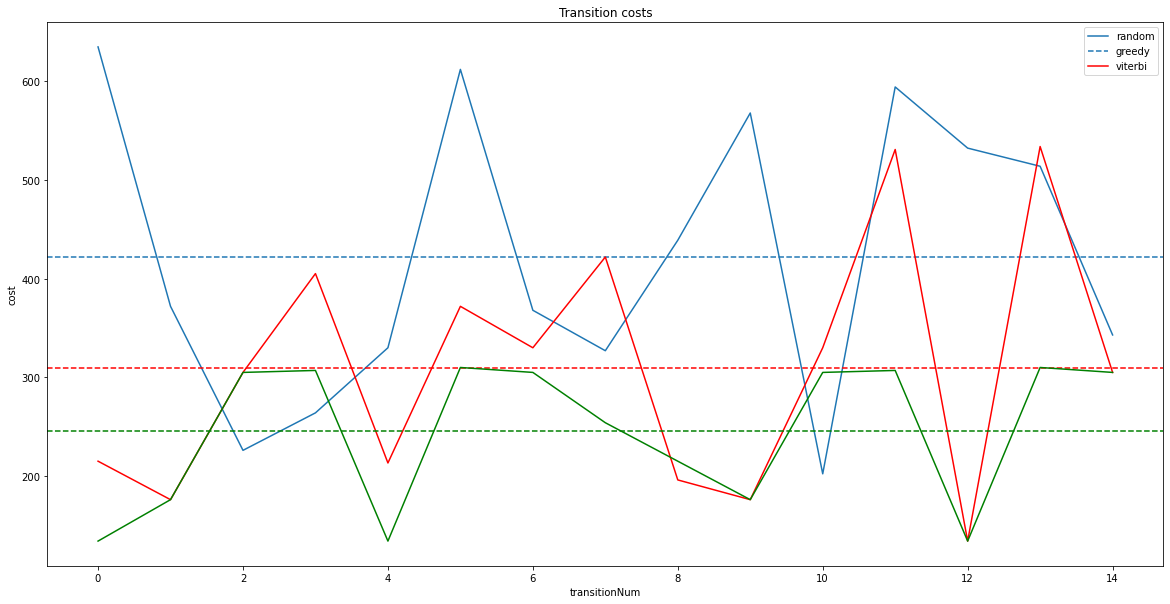

In [394]:
plt.figure(figsize = (20, 10))
plt.plot(costs_random)
plt.axhline(y = np.mean(costs_random), linestyle = '--')

plt.plot(costs_greedy, color = 'r')
plt.axhline(y = np.mean(costs_greedy), color = 'r', linestyle = '--')

plt.plot(costs_viterbi, color = 'g')
plt.axhline(np.mean(costs_viterbi), color='g', linestyle='--')

plt.title('Transition costs')
plt.xlabel('transitionNum')
plt.ylabel('cost')
plt.legend(['random', 'greedy', 'viterbi'])

### Read tests.csv

In [11]:
def read_test_progression(df, progNum):
    # Return rows from df that match progNum
    return df[df['progNum'] == progNum]

def stack_chords_by_measure(df):
    # Get unique values of Measures in the df
    numMeasures = len(df['Measure'].unique())
    chords = []
    for i in range(1, numMeasures + 1):
        chords_measure = df[df['Measure'] == i]
        chords_measure['prog'] = chords_measure['Root'] + ' ' + chords_measure['ChordType']
        chords.append(chords_measure['prog'].tolist())
    return chords

def gen_test_input(df, progNum):
    df = read_test_progression(df, progNum)
    chords = stack_chords_by_measure(df)
    return chords

In [12]:
df = pd.read_csv('tests.csv')
progNum = 1

In [15]:
# chords_random = gen_test_input(df, progNum)
# optimizer = 'random'
# li_tmp_random, firstc_cost = parseleft_S(chords_random, df, optimizer, chordsDB)
# costs_tmp_random = evaluate_cost(li_tmp_random)

# chords_cost = gen_test_input(df, progNum)
# optimizer = 'cost'
# li_tmp_cost, firstc_cost = parseleft_S(chords_cost, df, optimizer, chordsDB)
# costs_tmp_random = evaluate_cost(li_tmp_cost)

In [14]:
df

,progNum,Measure,Root,ChordType
0,1,1,C,M
1,1,1,A,m
2,1,1,F,M
3,1,1,G,M
4,1,2,C,M
5,1,2,A,m
6,1,2,F,M
7,1,2,G,M
8,1,3,C,M
9,1,3,A,m


root: C, chordType: M
root: C, chordType: M
root: C, chordType: M
root: C, chordType: M
[[[[8, 7, 5, 5, 5, 3], [2, 2, 2, 2, 2, 2]], [[5.0, 7.0, 7.0, 5.0, 5.0, 5.0], [2, 2, 2, 2, 2, 2]], [[1.0, 8.0, 7.0, 5.0, 6.0, 5.0], [2, 2, 2, 2, 2, 2]], [[3.0, 5.0, 5.0, 4.0, 8.0, 7.0], [2, 2, 2, 2, 2, 2]]], [[[8, 7, 5, 5, 8, 5], [2, 2, 2, 2, 2, 1]], [[5.0, 7.0, 7.0, 5.0, 5.0, 5.0], [2, 2, 2, 2, 2, 2]], [[1.0, 8.0, 7.0, 5.0, 6.0, 5.0], [2, 2, 2, 2, 2, 2]], [[3.0, 5.0, 5.0, 4.0, 8.0, 7.0], [2, 2, 2, 2, 2, 2]]], [[[8, 7, 5, 9, 1, 3], [2, 2, 2, 2, 2, 2]], [[5.0, 7.0, 7.0, 9.0, 1.0, 5.0], [2, 2, 2, 2, 2, 2]], [[1.0, 8.0, 7.0, 5.0, 6.0, 5.0], [2, 2, 2, 2, 2, 2]], [[3.0, 5.0, 5.0, 4.0, 8.0, 7.0], [2, 2, 2, 2, 2, 2]]], [[[8, 7, 5, 5, 5, 3], [2, 2, 2, 2, 2, 2]], [[5.0, 7.0, 7.0, 5.0, 5.0, 5.0], [2, 2, 2, 2, 2, 2]], [[1.0, 8.0, 7.0, 5.0, 6.0, 5.0], [2, 2, 2, 2, 2, 2]], [[3.0, 5.0, 5.0, 4.0, 8.0, 7.0], [2, 2, 2, 2, 2, 2]]]]


In [155]:
cost_tmp = evaluate_cost(li_tmp)
print (cost_tmp)
print (np.mean(cost_tmp))

[8, 7, 5, 5, 5, 3] [2, 2, 2, 2, 2, 2]
[196.0, 176.0, 330.0, 226.0, 215.0, 176.0, 330.0, 646.0, 196.0, 400.0, 330.0, 422.0, 196.0, 176.0, 330.0]
289.6666666666667


In [18]:
optimizer = 'random'
chDB = 'Human'
UI_human = [['C M', 'A m', 'F M', 'G M'], ['A m', 'C M', 'F M', 'G M'], ['C M', 'A m', 'F M', 'G M'], ['A m', 'C M', 'F M', 'G M']]
li_cost, firstc_cost  = parseleft_S(UI_human, df, optimizer, chDB)
print (li_cost)

root: C, chordType: M


ValueError: could not convert string to float: 'M'